# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key
# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 578


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
# api_key= weather_api_key
# units = "metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0


    city_url = f"{url}q={city}&units=metric&appid={weather_api_key}"
    
    
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather['dt']
        
       # city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date
                         })

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | hawaiian paradise park
Processing Record 2 of Set 1 | edinburgh of the seven seas
Processing Record 3 of Set 1 | bredasdorp
Processing Record 4 of Set 1 | el granada
Processing Record 5 of Set 1 | freetown
Processing Record 6 of Set 1 | hermanus
Processing Record 7 of Set 1 | waitangi
Processing Record 8 of Set 1 | afaahiti
Processing Record 9 of Set 1 | yellowknife
Processing Record 10 of Set 1 | ribeira grande
Processing Record 11 of Set 1 | rio verde de mato grosso
Processing Record 12 of Set 1 | flying fish cove
Processing Record 13 of Set 1 | albany
Processing Record 14 of Set 1 | susuman
Processing Record 15 of Set 1 | hami
Processing Record 16 of Set 1 | le pouliguen
Processing Record 17 of Set 1 | evergreen
Processing Record 18 of Set 1 | khorugh
Processing Record 19 of Set 1 | isafjordur
Processing Record 20 of Set 1 | utrik
Processing Record 21 of Set 1 | bilibino
Processing Record 22 o

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
# Show Record Count
city_data_df.count()

City          546
Lat           546
Lng           546
Max Temp      546
Humidity      546
Cloudiness    546
Wind Speed    546
Country       546
Date          546
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,hawaiian paradise park,19.5933,-154.9731,21.73,94,100,0.45,US,1712033022
1,edinburgh of the seven seas,-37.0676,-12.3116,18.75,96,66,8.43,SH,1712033022
2,bredasdorp,-34.5322,20.0403,17.55,81,61,4.51,ZA,1712032978
3,el granada,37.5027,-122.4694,15.46,59,20,5.14,US,1712033023
4,freetown,8.4840,-13.2299,25.26,87,66,2.21,SL,1712032967


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,hawaiian paradise park,19.5933,-154.9731,21.73,94,100,0.45,US,1712033022
1,edinburgh of the seven seas,-37.0676,-12.3116,18.75,96,66,8.43,SH,1712033022
2,bredasdorp,-34.5322,20.0403,17.55,81,61,4.51,ZA,1712032978
3,el granada,37.5027,-122.4694,15.46,59,20,5.14,US,1712033023
4,freetown,8.4840,-13.2299,25.26,87,66,2.21,SL,1712032967


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

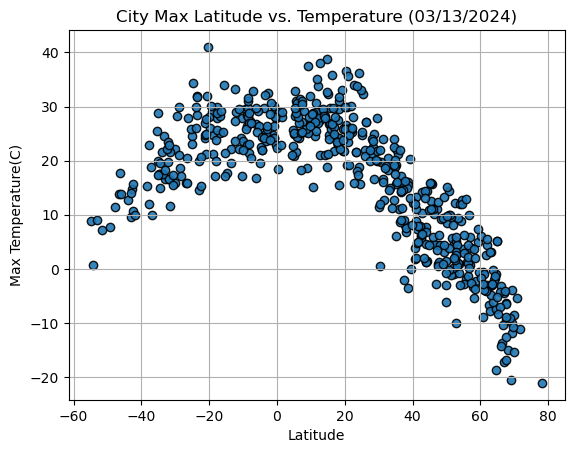

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolors='black', alpha=.9)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature(C)")
plt.title(f'City Max Latitude vs. Temperature (03/13/2024)')
plt.grid(True) 

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

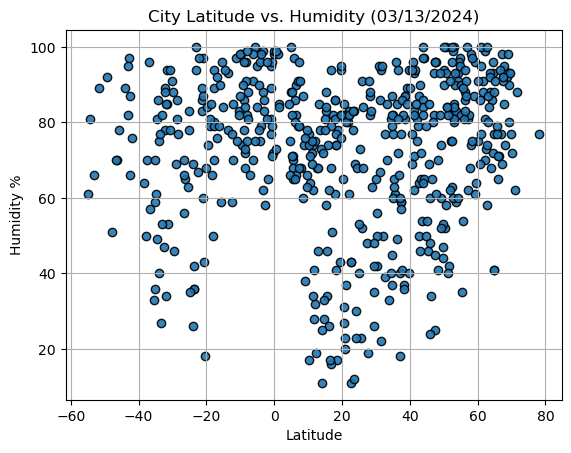

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolors='black', alpha=.9)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity %")
plt.title("City Latitude vs. Humidity (03/13/2024)")
plt.grid(True) 

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

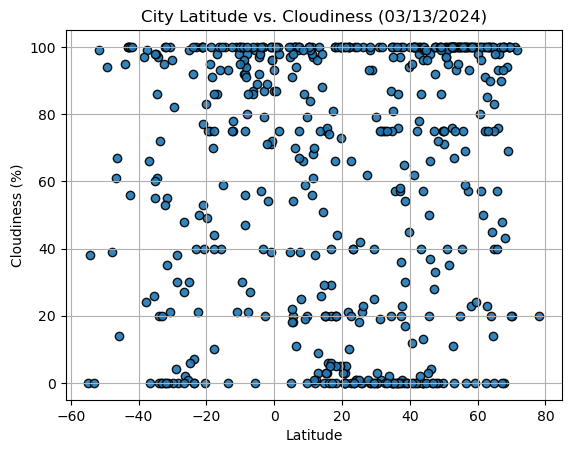

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolors='black', alpha=.9)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs. Cloudiness (03/13/2024)")
plt.grid(True) 

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

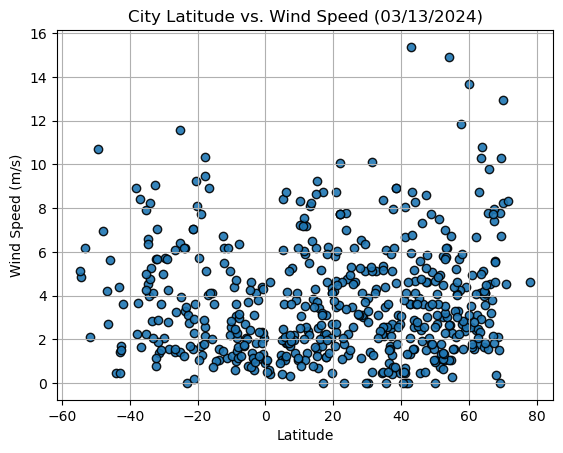

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolors='black', alpha=.9)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("City Latitude vs. Wind Speed (03/13/2024)")
plt.grid(True) 

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [23]:
def plot_linear_regression(x, y):
    # Perform linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
    
    # Plot data points
    plt.scatter(x, y)
    
    # Plot regression line
    plt.plot(x, regress_values, "r-", label='Regression Line')
    plt.annotate(line_eq, (x.min(), y.min()), fontsize=16, color="#c1121f", verticalalignment='bottom', horizontalalignment='left')
    # Add labels and legend
    print(f"The r-value is: {rvalue**2}")
    # plt.xlabel("Latitude")
    # plt.ylabel("Max Temp")
    plt.legend()
    plt.show()

In [24]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,hawaiian paradise park,19.5933,-154.9731,21.73,94,100,0.45,US,1712033022
3,el granada,37.5027,-122.4694,15.46,59,20,5.14,US,1712033023
4,freetown,8.4840,-13.2299,25.26,87,66,2.21,SL,1712032967
8,yellowknife,62.4560,-114.3525,-6.71,73,0,3.09,CA,1712032996
9,ribeira grande,38.5167,-28.7000,15.99,87,17,8.94,PT,1712032895


In [25]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] <0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,edinburgh of the seven seas,-37.0676,-12.3116,18.75,96,66,8.43,SH,1712033022
2,bredasdorp,-34.5322,20.0403,17.55,81,61,4.51,ZA,1712032978
5,hermanus,-34.4187,19.2345,14.89,86,97,3.99,ZA,1712032912
6,waitangi,-43.9535,-176.5597,12.68,89,95,0.45,NZ,1712032840
7,afaahiti,-17.7500,-149.2833,27.93,80,44,9.46,PF,1712033024


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.8112352670498714


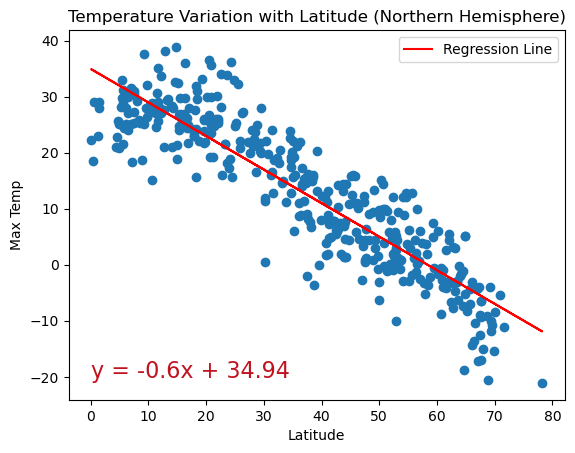

In [26]:
# Linear regression on Northern Hemisphere
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.title("Temperature Variation with Latitude (Northern Hemisphere)")
plot_linear_regression(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'])


**Discussion about the linear relationship:**
 - The linear regression analysis for the Northern Hemisphere revealed a moderately strong relationship between the independent variable (Latitude) and the dependent variable (Temperature), with an R-squared value of 0.7382, indicating that approximately 73.82% of the variability in Temperature can be explained by Latitude. The equation of the line, Y = -0.71X + 37.52, suggests a negative relationship between the variables, implying that for every unit increase in Latitude, Temperature  decreases by 0.71 units.

The r-value is: 0.44406039269098724


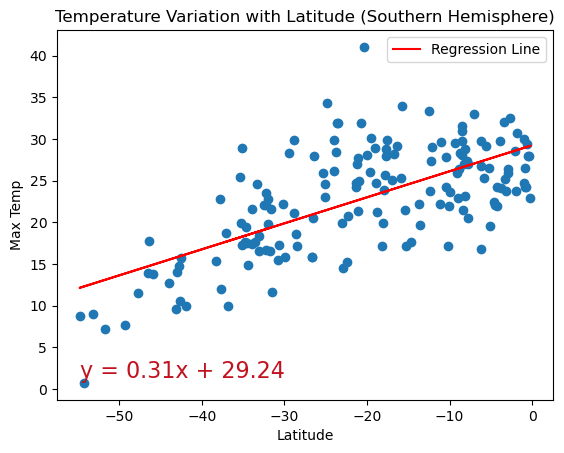

In [27]:
# Linear regression on Southern Hemisphere
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.title("Temperature Variation with Latitude (Southern Hemisphere)")
plot_linear_regression(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'])

**Discussion about the linear relationship:**
 - The linear regression analysis for the Southern Hemisphere resulted in an R-squared value of 0.5118, indicating that approximately 51.18% of the variability in the dependent variable (Temperature) can be explained by the independent variable (Latitude). The equation of the line, Y = 0.34X + 31.02, suggests a positive relationship between the variables, indicating that for every unit increase in Latitude, Temperature increases by 0.34 units.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.0613181825847324


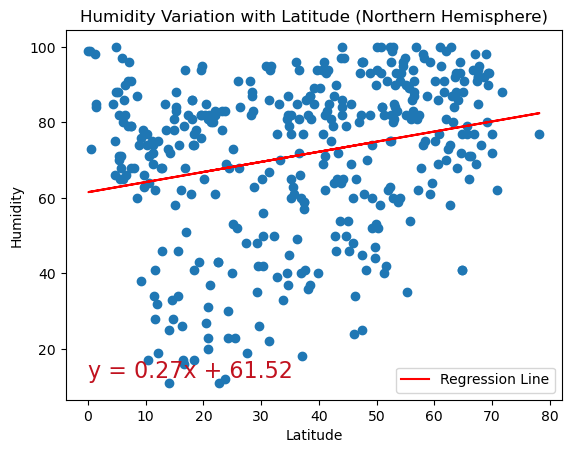

In [28]:
# Northern Hemisphere
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Humidity Variation with Latitude (Northern Hemisphere)")
plot_linear_regression(northern_hemi_df['Lat'], northern_hemi_df['Humidity'])

**Discussion about the linear relationship:**
 - The linear regression analysis of Humidity vs. Latitude in the Northern Hemisphere resulted in an R-squared value of 0.1733, indicating that approximately 17.33% of the variability in humidity can be explained by latitude. The equation of the regression line, y = 0.5x + 50.15, suggests a positive but weak relationship between latitude and humidity, with humidity increasing slightly as latitude increases. However, the low R-squared value suggests that latitude alone may not be a strong predictor of humidity levels in the Northern Hemisphere.

The r-value is: 0.08070369827872909


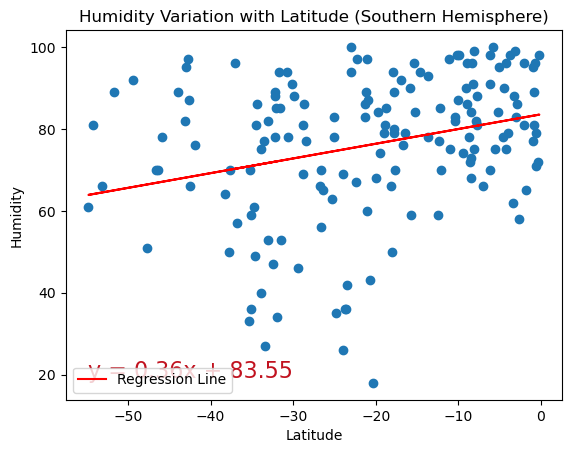

In [29]:
# Southern Hemisphere
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Humidity Variation with Latitude (Southern Hemisphere)")
plot_linear_regression(southern_hemi_df['Lat'], southern_hemi_df['Humidity'])

**Discussion about the linear relationship:** 
 - The linear regression analysis for Humidity vs. Latitude in the Southern Hemisphere resulted an R-squared value of 0.0362, indicating that approximately 3.62% of humidity variability can be explained by latitude alone. The equation of the regression line, y = 0.25x + 80.81, suggests a slight increase in humidity with latitude, although the effect is minimal given the small coefficient. This suggests that latitude alone may not strongly predict humidity levels in the Southern Hemisphere.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.03888249300785215


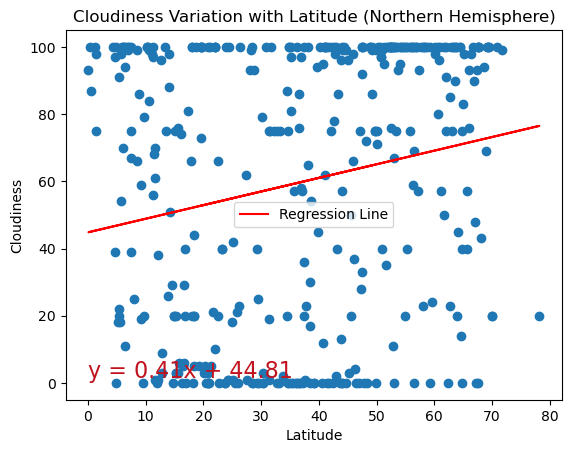

In [30]:
# Northern Hemisphere
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Cloudiness Variation with Latitude (Northern Hemisphere)")
plot_linear_regression(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'])

**Discussion about the linear relationship:** 
 - In the Northern Hemisphere, the linear regression analysis for Cloudiness vs. Latitude resulted in an R-squared value of 0.0649, indicating that approximately 6.49% of the variation in cloudiness can be explained by latitude. The equation of the regression line, y = 0.56x + 38.15, suggests a slight positive relationship between latitude and cloudiness, although the effect size is relatively weak. 

The r-value is: 0.08249835547792227


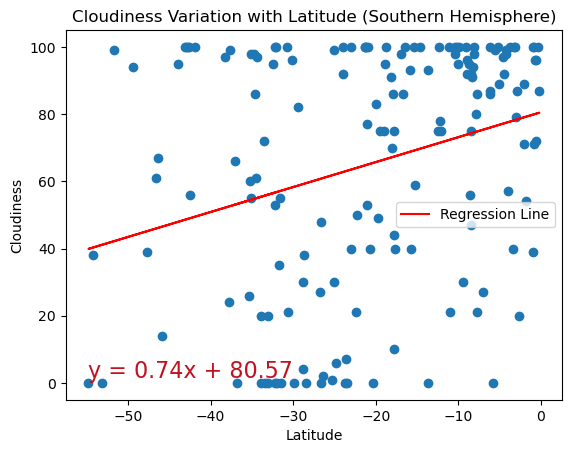

In [31]:
# Southern Hemisphere
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Cloudiness Variation with Latitude (Southern Hemisphere)")
plot_linear_regression(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'])

**Discussion about the linear relationship:** 
- In the Southern Hemisphere, the linear regression analysis for Cloudiness vs. Latitude resulted in an R-squared value of 0.0290, suggesting that approximately 2.90% of the variation in cloudiness can be explained by latitude. The equation of the regression line, y = 0.46x + 74.23, indicates a positive relationship between latitude and cloudiness, though the effect size is relatively weak. 

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.017009056245563182


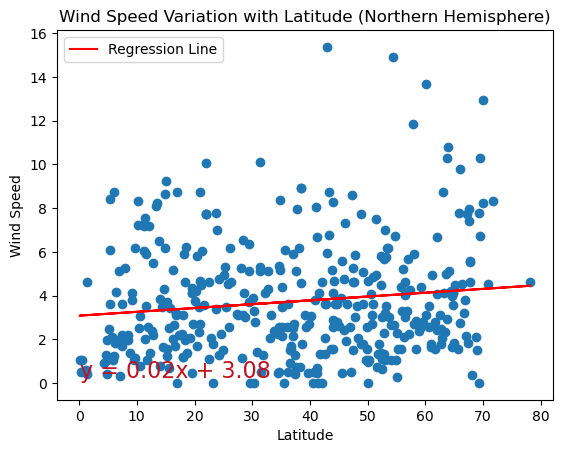

In [32]:
# Northern Hemisphere
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Wind Speed Variation with Latitude (Northern Hemisphere)")
plot_linear_regression(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'])

**Discussion about the linear relationship:** 
 - In the Northern Hemisphere, the linear regression analysis for Wind Speed vs. Latitude resulted in an R-squared value of 0.00032, indicating that approximately 0.03% of the variability in wind speed can be explained by latitude alone. The equation of the regression line, y = -0.0x + 4.01, suggests an insignificant relationship between latitude and wind speed. This implies that latitude is not a significant predictor of wind speed in the Northern Hemisphere

The r-value is: 0.08618204214944873


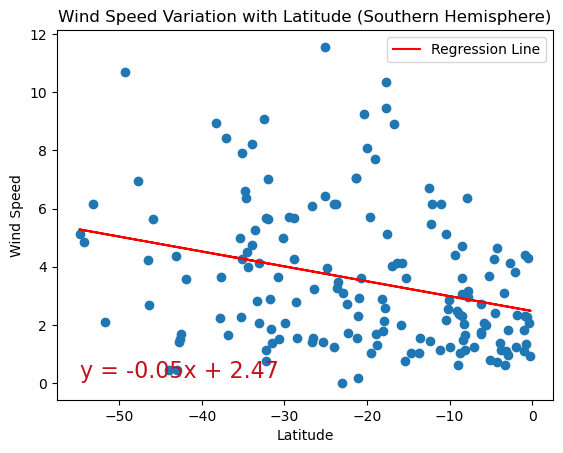

In [33]:
# Southern Hemisphere
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Wind Speed Variation with Latitude (Southern Hemisphere)")
plot_linear_regression(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'])

**Discussion about the linear relationship:** 
- In the Southern Hemisphere, the linear regression analysis for Wind Speed vs. Latitude resulted in an R-squared value of 0.0467, indicating that approximately 4.67% of the variability in wind speed can be explained by latitude alone. The equation of the regression line, y = -0.04x + 2.78, suggests a slight negative relationship between latitude and wind speed. This implies that, on average, wind speed tends to decrease slightly as latitude increases in the Southern Hemisphere. However, the effect size is relatively small. 